In [ ]:
!pip install control
import control as ct
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

R = 100
L = 0.1
Cap = 1e-6

A = np.array([[0, 1], [-1/(L*Cap), -R/L]])  #Matriz de Estado
B = np.array([[0], [1/L]])  #Matriz de Entrada
C = np.array([1/Cap, 0])  #Matriz de Salida
D = 0  #Matriz de Transferencia directa

sys = ct.ss(A, B, C, D)

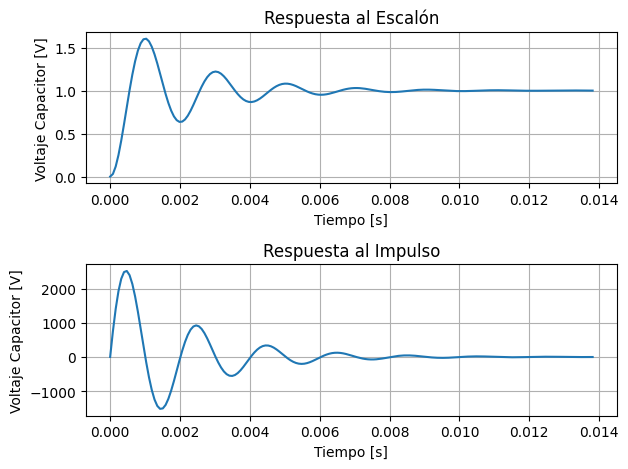

In [ ]:
[t1, y1] = ct.step_response(sys)
[t2, y2] = ct.impulse_response(sys)

plt.subplot(2,1,1)
plt.plot(t1,y1)
plt.grid()
plt.title("Respuesta al Escalón")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje Capacitor [V]")
plt.subplot(2,1,2)
plt.plot(t2,y2)
plt.grid()
plt.title("Respuesta al Impulso")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje Capacitor [V]")
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Voltaje Capacitor [V]')

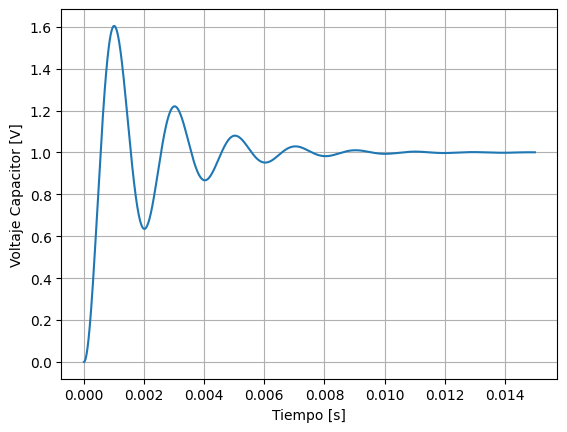

In [ ]:
def modelRLC(t,x,A,B,u):
  dx = A @ x + B.flatten() * u
  return dx


ts = 0.015
tspan = (0,ts)
u = 1
x0 = np.array([0, 0])

sol = sp.integrate.solve_ivp(lambda t,x: modelRLC(t,x,A,B,u),
                             tspan, x0, t_eval=np.linspace(0,ts,1000))

t = sol.t
X = sol.y

Y = C @ X + D * u

plt.plot(t, Y)
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje Capacitor [V]")


Text(0, 0.5, 'Voltaje Capacitor [V]')

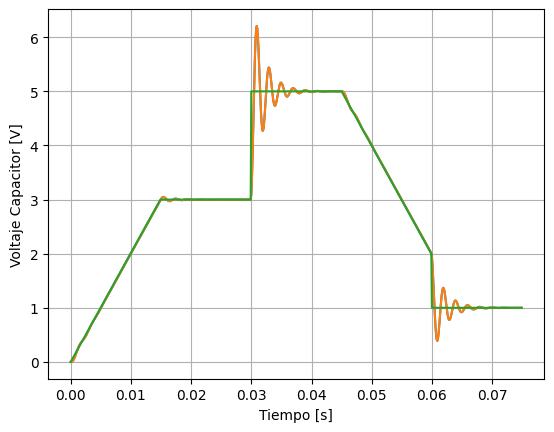

In [ ]:
ti = np.arange(0,5*ts,0.0001)
N = len(ti)
size_y = int(N/5)

s1 = np.linspace(0, 3, size_y)
s2 = np.ones(size_y)*3
s3 = np.ones(size_y)*5
s4 = np.linspace(5, 2, size_y)
s5 = np.ones(N-4*size_y)

u = np.concatenate([s1, s2, s3, s4, s5])

n = A.shape[0]
X = np.zeros((N,n))
X[0,:] = np.zeros(n)
t = np.zeros(N)
t[0] = ti[0]

for k in range(1,N):
  sol = sp.integrate.solve_ivp(lambda t,x: modelRLC(t,x,A,B,u[k]),
                               [ti[k-1], ti[k]], X[k-1,:], t_eval=[ti[k]])
  t[k] = sol.t[-1]
  X[k, :] = sol.y[:,-1]

Y = np.zeros((N, C.shape[0]))
for k in range(N):
  Y[k,:] = C @ X[k,:].T + D*u[k]

plt.plot(t,Y)
plt.plot(t,u)
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje Capacitor [V]")